In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data= pd.read_csv("datas/p2-arbres-fr.csv", sep=";") #chargement du fichier CSV dans la variables data
print(data.head(10)) #Affiche les 10 première ligne du fichier pour vérifier que ce dernier est bien chargé

      id type_emplacement domanialite   arrondissement complement_addresse  \
0  99874            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
1  99875            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
2  99876            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
3  99877            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
4  99878            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
5  99879            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
6  99880            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
7  99881            Arbre      Jardin  PARIS 16E ARRDT                 NaN   
8  99882            Arbre      Jardin  PARIS 16E ARRDT                 NaN   
9  99883            Arbre      Jardin  PARIS 16E ARRDT                 NaN   

   numero                                               lieu id_emplacement  \
0     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E  

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [14]:
dimension = data.shape
print(f"Le nombre de ligne du dataFrame {dimension[0]}")
print(f"Le nombre de colonne du dataFrame {dimension[1]}")

Le nombre de ligne du dataFrame 200137
Le nombre de colonne du dataFrame 18


In [16]:
data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


In [314]:
# Calcul des caractéristiques principales pour les variables quantitatives
quantitative_columns = ['circonference_cm', 'hauteur_m', 'geo_point_2d_a', 'geo_point_2d_b']

# Describe pour obtenir les statistiques de base
stats_summary = data[quantitative_columns].describe().transpose()

# Affiche le résumé des statistiques
print(stats_summary)

                     count       mean          std        min        25%  \
circonference_cm  200137.0  83.380479   673.190213   0.000000  30.000000   
hauteur_m         200137.0  13.110509  1971.217387   0.000000   5.000000   
geo_point_2d_a    200137.0  48.854491     0.030234  48.742290  48.835021   
geo_point_2d_b    200137.0   2.348208     0.051220   2.210241   2.307530   

                        50%         75%            max  
circonference_cm  70.000000  115.000000  250255.000000  
hauteur_m          8.000000   12.000000  881818.000000  
geo_point_2d_a    48.854162   48.876447      48.911485  
geo_point_2d_b     2.351095    2.386838       2.469759  


In [396]:
# Autre façon d'obtenir les statistiques avec les methodes
stats_dict={}

for column in quantitative_columns:
    stats_dict[column]={
        'Nb de valeur (count)':data[column].count(),
        'Moyenne (mean)':data[column].mean(),
        'std (ecart type)':data[column].std(),
        'mini':data[column].min(),
        '25%':data[column].quantile(0.25),
        '50% mediane':data[column].median(),
        '75%':data[column].quantile(0.75),
        'maxi':data[column].max()
    }

#conversion du dictionnaire en Dataframe pour un meilleur affichage
stats_df=pd.DataFrame(stats_dict).transpose()
print(stats_df)

                  Nb de valeur (count)  Moyenne (mean)  std (ecart type)  \
circonference_cm              200137.0       83.380479        673.190213   
hauteur_m                     200137.0       13.110509       1971.217387   
geo_point_2d_a                200137.0       48.854491          0.030234   
geo_point_2d_b                200137.0        2.348208          0.051220   

                       mini        25%  50% mediane         75%           maxi  
circonference_cm   0.000000  30.000000    70.000000  115.000000  250255.000000  
hauteur_m          0.000000   5.000000     8.000000   12.000000  881818.000000  
geo_point_2d_a    48.742290  48.835021    48.854162   48.876447      48.911485  
geo_point_2d_b     2.210241   2.307530     2.351095    2.386838       2.469759  


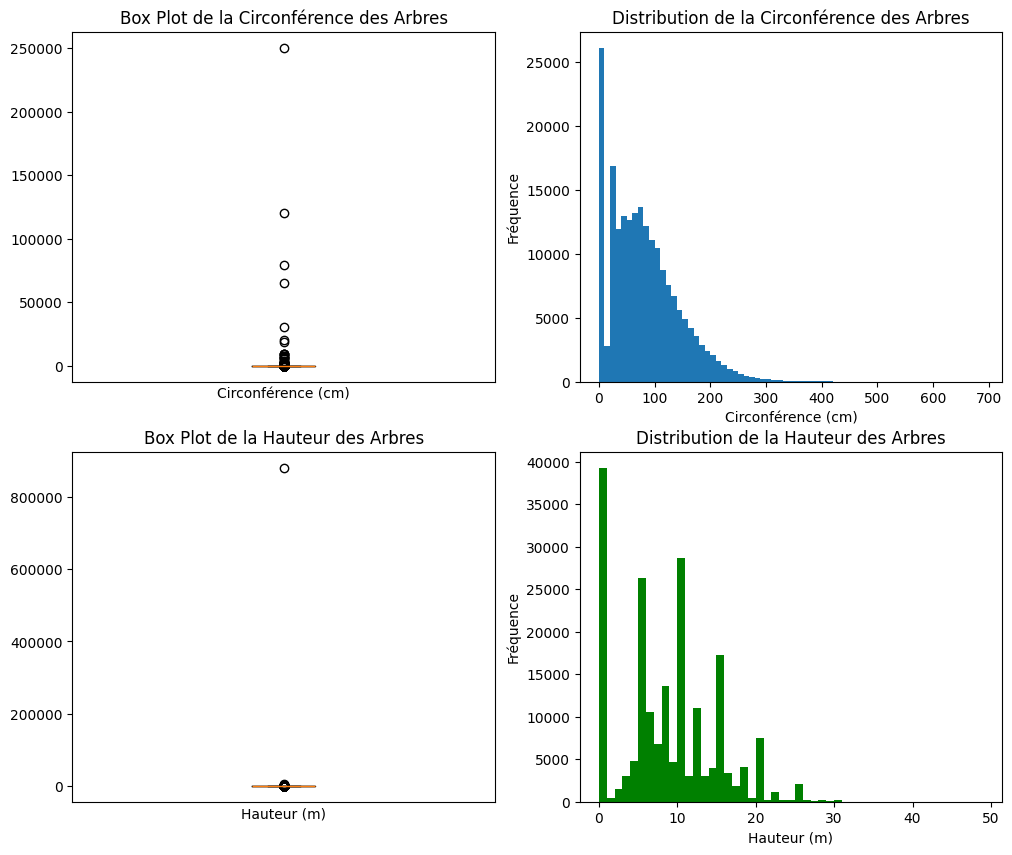

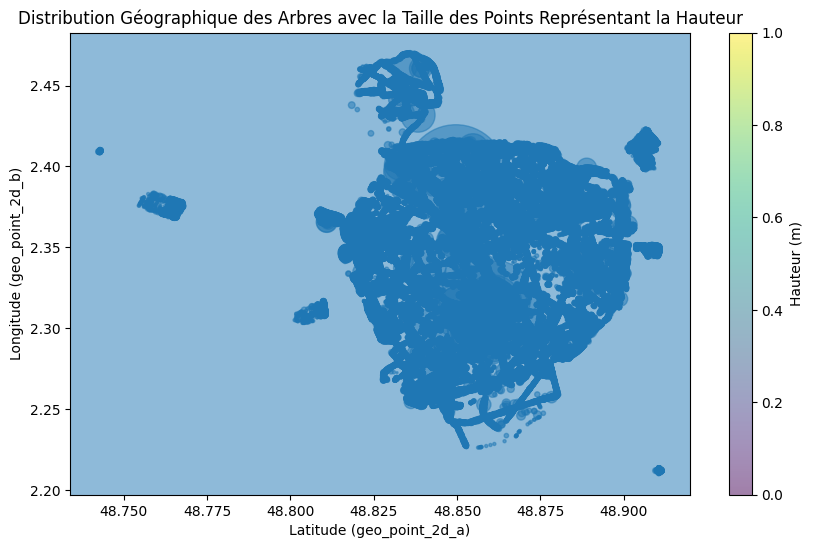

In [785]:
def create_graphics(data):
    plt.figure(figsize=(12,10))

    # Box plot pour circonference_cm
    plt.subplot(2,2,1)
    plt.boxplot(data['circonference_cm'])
    plt.title('Box Plot de la Circonférence des Arbres')
    plt.xlabel('Circonférence (cm)')
    plt.xticks([])
    
    # Histogramme avec courbe de densité pour circonference_cm
    plt.subplot(2,2,2)
    plt.hist(data['circonference_cm'], bins=range(0,700,10))
    plt.title('Distribution de la Circonférence des Arbres')
    plt.xlabel('Circonférence (cm)')
    plt.ylabel('Fréquence')

    # Box plot pour la hauteur_m
    plt.subplot(2,2,3)
    plt.boxplot(data['hauteur_m'])
    plt.title('Box Plot de la Hauteur des Arbres')
    plt.xlabel('Hauteur (m)')
    plt.xticks([])

    # Histogramme avec courbe de densité pour hauteur_m
    plt.subplot(2,2,4)
    plt.hist(data['hauteur_m'], bins =range(0,50,1), color='green')
    plt.title('Distribution de la Hauteur des Arbres')
    plt.xlabel('Hauteur (m)')
    plt.ylabel('Fréquence')

    plt.figure(figsize=(10,6))
    plt.scatter(data['geo_point_2d_a'],data['geo_point_2d_b'], s=data['hauteur_m'], alpha=0.5)
    plt.title('Distribution Géographique des Arbres avec la Taille des Points Représentant la Hauteur')
    plt.xlabel('Latitude (geo_point_2d_a)')
    plt.ylabel('Longitude (geo_point_2d_b)')
    plt.colorbar(label='Hauteur (m)')

create_graphics(data)

In [519]:
def plot_qualitative(data,column, title,ylabel):
    plt.figure(figsize=(10,6))
    data[column].value_counts().plot(kind='bar')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel(ylabel)

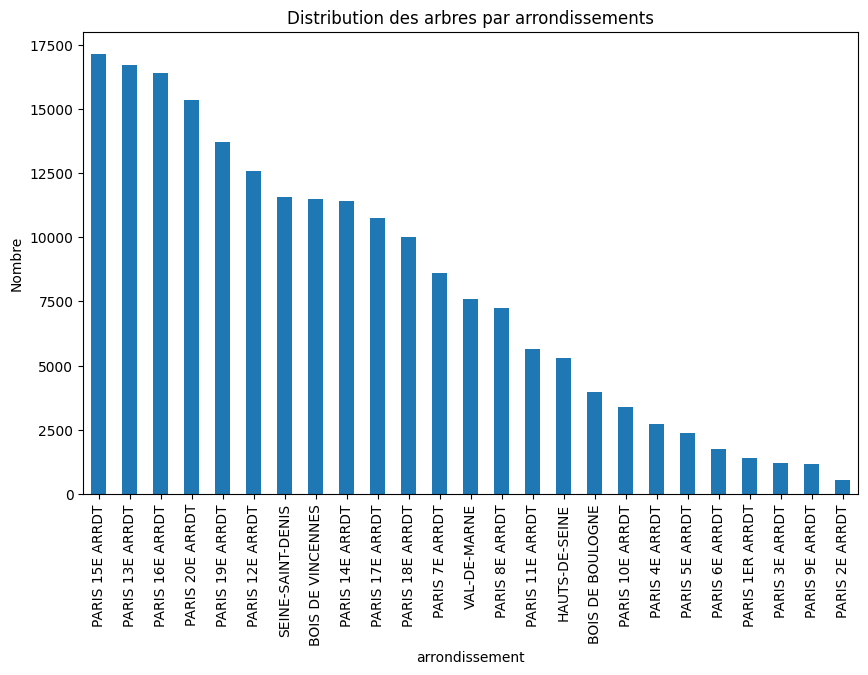

In [531]:
plot_qualitative(data,'arrondissement','Distribution des arbres par arrondissements','Nombre')

In [781]:
grouped_data = data.groupby(['arrondissement', 'genre']).size().reset_index(name='count')

Text(0, 0.5, "Nombre d'arbres")

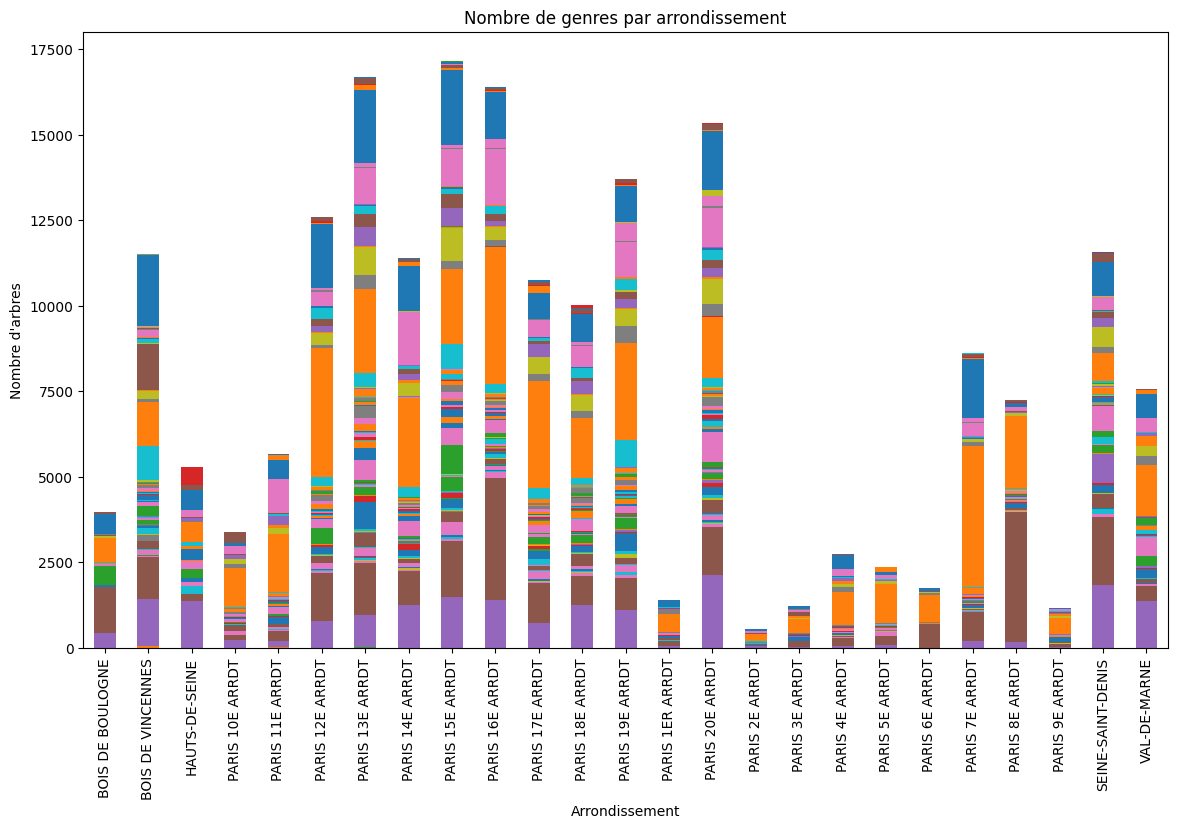

In [783]:
pivot_data = grouped_data.pivot(index='arrondissement', columns='genre', values='count').fillna(0)

# Créer un graphique en barres empilé
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), legend=False)

plt.title('Nombre de genres par arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Nombre d\'arbres')


In [847]:
top_10_cirocnference = data.nlargest(10,'hauteur_m')
top_10_cirocnference

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
182852,2003429,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,ROUTE DE LA PYRAMIDE,301046,Tilleul,Tilia,tomentosa,NaN,125,881818,J,0.0,48.823514,2.458010
150101,274101,Arbre,Alignement,PARIS 11E ARRDT,NaN,NaN,AVENUE PHILIPPE AUGUSTE,101004,Sophora,Sophora,japonica,NaN,155,5155,JA,0.0,48.849641,2.395007
152110,276202,Arbre,Alignement,PARIS 7E ARRDT,286,NaN,BOULEVARD SAINT GERMAIN,6202008,Platane,Platanus,occidentalis,NaN,215,2525,A,0.0,48.861813,2.320157
101985,223083,Arbre,Alignement,PARIS 7E ARRDT,193,NaN,BOULEVARD SAINT GERMAIN,4301006,Platane,Platanus,x hispanica,NaN,130,2015,A,0.0,48.854991,2.328282
152205,276297,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,ESPLANADE DES INVALIDES,410006,Tilleul,Tilia,tomentosa,NaN,130,1815,A,0.0,48.860649,2.314739
147984,271760,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,AVENUE BOSQUET,901008,Platane,Platanus,occidentalis,NaN,130,1610,A,0.0,48.856778,2.304586
151382,275469,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,ESPLANADE DES INVALIDES,410011,Tilleul,Tilia,tomentosa,NaN,85,1515,A,0.0,48.860430,2.314716
152238,276330,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,ESPLANADE DES INVALIDES,408014,Tilleul,Tilia,tomentosa,NaN,90,1515,JA,0.0,48.860305,2.314557
152437,276530,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,ESPLANADE DES INVALIDES,408011,Tilleul,Tilia,tomentosa,NaN,110,1515,JA,0.0,48.860437,2.314575
153314,277439,Arbre,Alignement,PARIS 7E ARRDT,23,NaN,AVENUE DE SEGUR,501003,Platane,Platanus,x hispanica,NaN,150,1514,A,0.0,48.851343,2.309778


In [885]:
print(data.columns)

Index(['id', 'type_emplacement', 'domanialite', 'arrondissement',
       'complement_addresse', 'numero', 'lieu', 'id_emplacement',
       'libelle_francais', 'genre', 'espece', 'variete', 'circonference_cm',
       'hauteur_m', 'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')
